In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
filteredGeneList = pd.read_csv('filteredGenesDetails_human_240118.txt',sep='\t')
filteredGeneList.head(2)

,GeneName,AccNum,Chrom,mRNALength,ORFLength,fpUTR_length,tpUTR_length,sumIntronLengths
0,UBE2Q1,NM_017582,chr1,3223,1269,91,1863,6847
1,DUOXA1,NM_001276267,chr15,3032,897,395,1740,9479


In [3]:
acc2gene={}
for idx,row in filteredGeneList.iterrows():
    acc2gene[row['AccNum']] = row['GeneName']
acc2gene['NM_017582']

'UBE2Q1'

In [4]:
def get_fa(filename,onlyKeys = 'All'):
    keyD = dict()
    if onlyKeys!='All':
        for k in onlyKeys: keyD[k] = None
        
    def addEntry(current,d):
        entry = current.split('\n')
        if entry[0]!='' and (onlyKeys=='All' or keyD.has_key(entry[0])):
            d[entry[0]] = ''.join(entry[1:])

    d = dict()
    bf = open(filename)
    current = ['\n']
    for line in bf:
        if line[0]=='>':
            addEntry(''.join(current),d)
            if len(line)>1: current = [line[1:]]
            else: current = ['\n']
        else: current.append(line)
    addEntry(''.join(current),d)
    bf.close()
    return d

In [7]:
splicedGenes = get_fa('splicedGenes_240118.txt')
print(type(splicedGenes))
print(list(splicedGenes.keys())[0:3])

<class 'dict'>
['NR_148357_chr1(+):11868-14361', 'NR_046018_chr1(+):11873-14408', 'NR_024540_chr1(-):14361-29369']


In [8]:
## truncate the keys to only accNum
ks = list(splicedGenes.keys())
for key in ks:
    splicedGenes[key.split('_chr')[0]] = splicedGenes[key]
    splicedGenes.pop(key)
print(type(splicedGenes))
print(list(splicedGenes.keys())[0:3])

<class 'dict'>
['NR_148357', 'NR_046018', 'NR_024540']


In [9]:
splicedORFs = get_fa('splicedORFs_240118.txt')
print(type(splicedORFs))
print(list(splicedORFs.keys())[0:3])

<class 'dict'>
['NM_017582', 'NM_001276267', 'NM_173469']


In [10]:
fpUTR={}
tpUTR = {}
ORFs = {}
for idx,row in filteredGeneList.iterrows():
    accNum = row['AccNum']
    fpLen = row['fpUTR_length']
    tpLen = row['tpUTR_length']
    fpUTR[accNum] = splicedGenes[accNum][0:fpLen]
    tpUTR[accNum] = splicedGenes[accNum][-tpLen:]
    ORFs[accNum] = splicedORFs[accNum]

'../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t2.csv'

In [23]:
L24_t1 = pd.read_csv('../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t1.csv')
dat,bgLocIds = extractPlotDat(L24_t1)


pass filter: 1271
up num:  189
down num:  15


In [35]:
def extractPlotDat(rawCsv):
    background = rawCsv['Unnamed: 0']
    
    filteredList = rawCsv[rawCsv['padj'] < 0.05]
    print('pass filter:' ,len(filteredList))

    filteredList = filteredList.sort_values(by=['log2FoldChange'])
    topNum=sum((filteredList['log2FoldChange']>1)*1)
    print('up num: ',topNum)
    botNum=sum((filteredList['log2FoldChange']<-1)*1)
    print('down num: ',botNum)
    downAccs = filteredList.loc[filteredList['log2FoldChange']<-1]['Unnamed: 0']
    upAccs = filteredList.loc[filteredList['log2FoldChange']>1]['Unnamed: 0']
    
    filteredGeneList['logFC'] = None
    filteredGeneList['noChange'] = None
    filteredGeneList.loc[filteredGeneList['AccNum'].isin(downAccs),'logFC'] = 'Up'
    filteredGeneList.loc[filteredGeneList['AccNum'].isin(upAccs),'logFC'] = 'Down'

    dat=filteredGeneList.loc[~filteredGeneList['logFC'].isna()]
    
    bgLocIds = filteredGeneList['AccNum'].isin(background)
    
    numPoints = topNum+botNum
    
    return dat,bgLocIds,numPoints
    

In [69]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def plotVS(keyword):
    size_ = 6.0/np.log(np.log(numPoints))
    ax = sns.violinplot( y='fpUTR_length', data=filteredGeneList.loc[bgLocIds], inner=None,color='palegreen')
    ax = sns.swarmplot(x=[""]*len(dat),y = dat['fpUTR_length'],hue = dat['logFC'],
        size=size_);
    ax.set_title(keyword)
    fig = ax.get_figure()
    fig.savefig('fpUTRLen/'+keyword+'.png')
    #plt.show()

pass filter: 4567
up num:  1406
down num:  1493


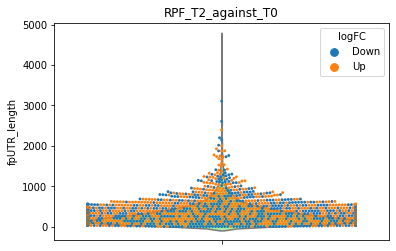

pass filter: 92
up num:  33
down num:  1


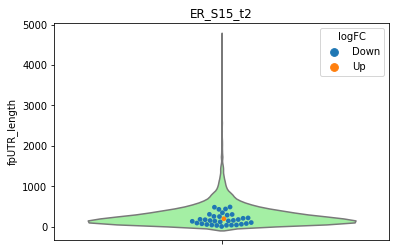

pass filter: 757
up num:  110
down num:  8


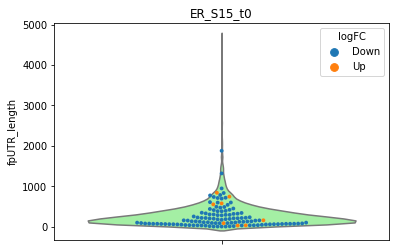

pass filter: 509
up num:  19
down num:  305


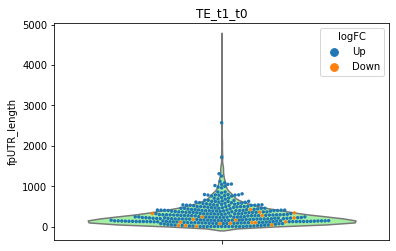

pass filter: 1271
up num:  189
down num:  15


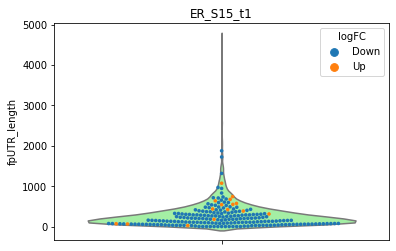

pass filter: 3917
up num:  741
down num:  1101


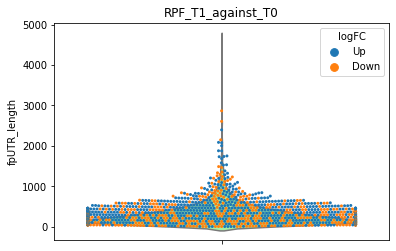

pass filter: 4175
up num:  1059
down num:  1242


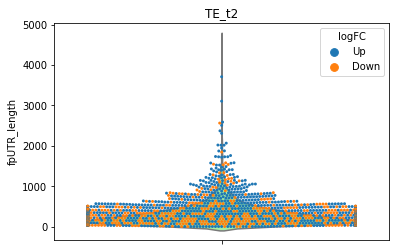

pass filter: 4258
up num:  842
down num:  1113


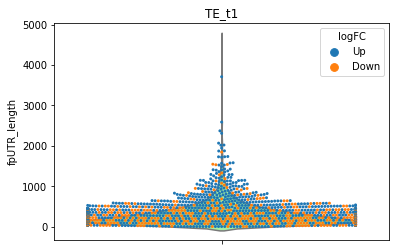

pass filter: 3968
up num:  978
down num:  979


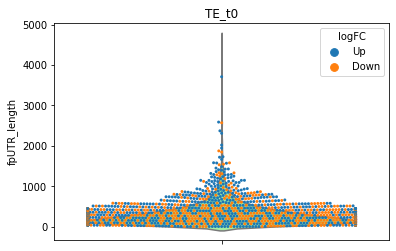

pass filter: 3500
up num:  803
down num:  906


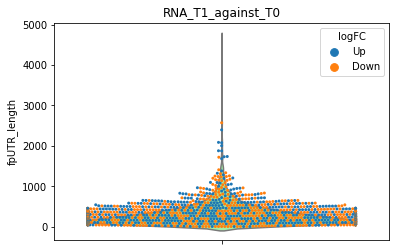

pass filter: 2
up num:  2
down num:  0


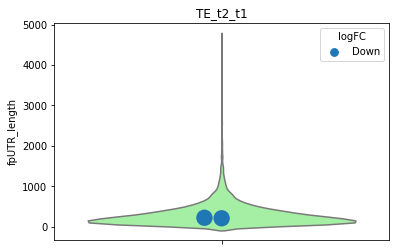

pass filter: 248
up num:  24
down num:  122


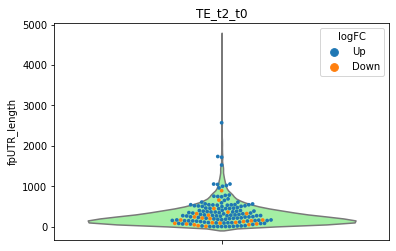

pass filter: 0
up num:  0
down num:  0
pass filter: 1
up num:  0
down num:  0
pass filter: 0
up num:  0
down num:  0
pass filter: 13
up num:  2
down num:  0


/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/Yue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


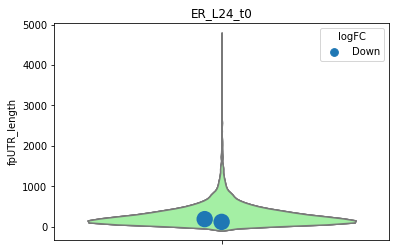

pass filter: 263
up num:  1
down num:  91


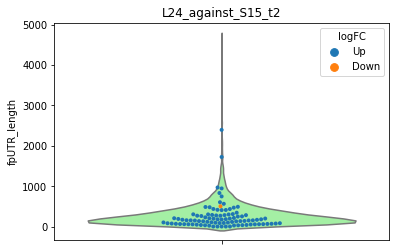

pass filter: 578
up num:  40
down num:  0


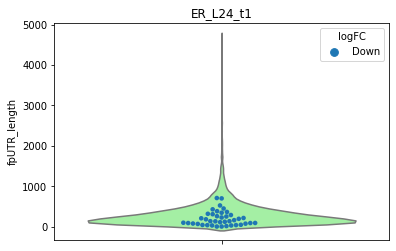

pass filter: 4216
up num:  1193
down num:  1088


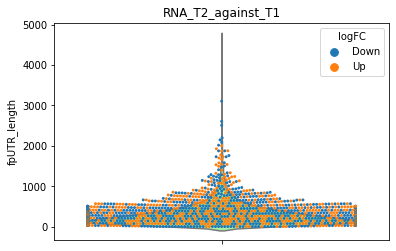

pass filter: 349
up num:  3
down num:  43


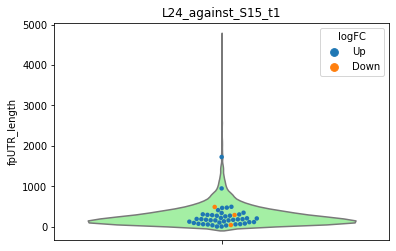

pass filter: 225
up num:  3
down num:  74


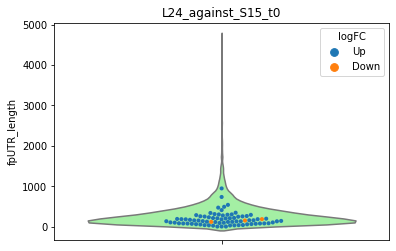

pass filter: 0
up num:  0
down num:  0
pass filter: 4675
up num:  1491
down num:  1408


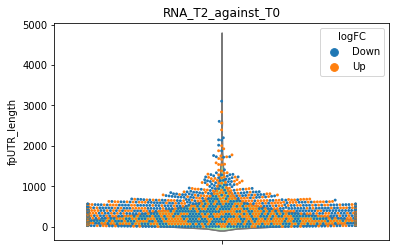

In [98]:
import glob
#myfiles = glob.glob('../Deseq2 Analysis/shift15/coding/csv_raw/*.csv')
myfiles[1]
for f in myfiles:
    try:
        rawCsv = pd.read_csv(f)
        dat,bgLocIds,numPoints = extractPlotDat(rawCsv)
        keyword = f.split('/')[-1].split('.')[0]
        plotVS(keyword)
        plt.show()
    except:
        continue

In [86]:
f

'../Deseq2 Analysis/shift15/coding/csv_raw/ER_L24_t2.csv'

In [92]:
myfiles

['../Deseq2 Analysis/shift15/coding/csv_raw/RPF_T2_against_T0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t2.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t1_t0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S15_t1.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/RPF_T1_against_T0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t1.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/RNA_T1_against_T0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2_t1.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/TE_t2_t0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S24_t2.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S24_t1.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_S24_t0.csv',
 '../Deseq2 Analysis/shift15/coding/csv_raw/ER_L24_t0.csv',
 '../Deseq2 Analysis/shift15/co

In [66]:
word = myfiles[0]
word.split('/')[-1].split('.')[0]

'RPF_T2_against_T0'

## generate fa files for fpUTR and fpUTR+100ORF

In [105]:
with open('fpUTR_all.fa','a') as file:
    for key in fpUTR.keys():
        file.write('>'+key+'\n')
        file.write(fpUTR[key]+'\n')

In [107]:
with open('fpUTR_100orf_all.fa','a') as file:
    for key in fpUTR.keys():
        file.write('>'+key+'\n')
        file.write(fpUTR[key]+ORFs[key][:100]+'\n')

In [106]:
len(list(fpUTR.keys()))

19210

In [ ]:

tips = sns.load_dataset("tips")
sns.swarmplot(x=[""]*len(tips),y="total_bill", hue="sex", data=tips)
plt.show()